In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load dataset
titanic_dataset = pd.read_csv('/content/Titanic-Dataset.csv')
print(titanic_dataset.describe())
print(titanic_dataset.info())
print(titanic_dataset.head())
print(titanic_dataset.tail())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

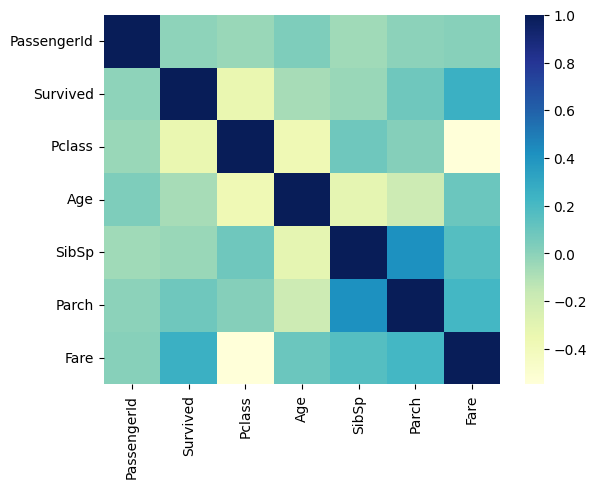

In [5]:
numeric_columns = titanic_dataset.select_dtypes(include=["int64", "float64"])

#plot the correlations
import seaborn as sns
sns.heatmap(numeric_columns.corr(), cmap = "YlGnBu")
plt.show()

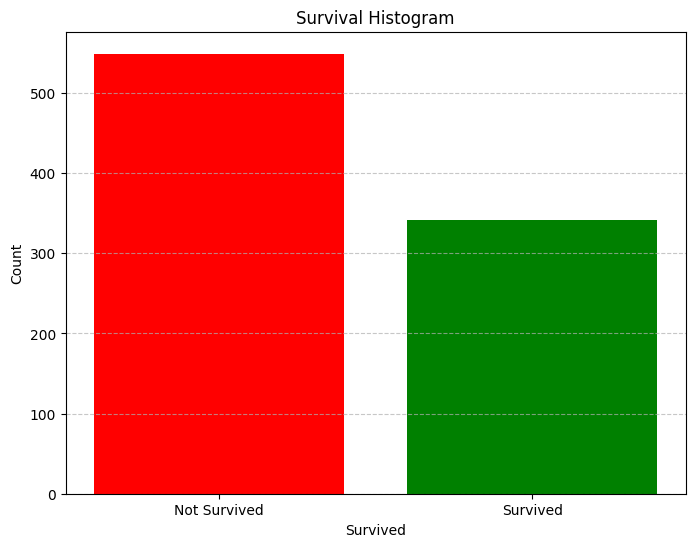

In [6]:
survived_counts = titanic_dataset['Survived'].value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(survived_counts.index, survived_counts.values, color=['red', 'green'])
plt.title('Survival Histogram')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(survived_counts.index, ['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

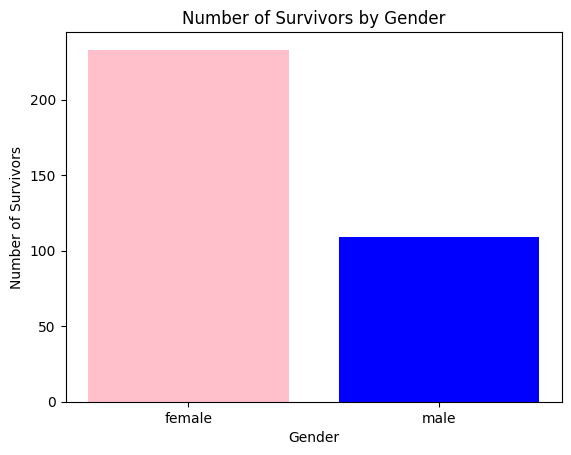

In [14]:
# Filter data for survived passengers
survived = titanic_dataset[titanic_dataset['Survived'] == 1]

# Group by 'Sex' and count the number of survivors
survivors_by_sex = survived.groupby('Sex').size()

# Plotting
plt.bar(survivors_by_sex.index, survivors_by_sex.values, color=['pink', 'blue'])
plt.title('Number of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.show()

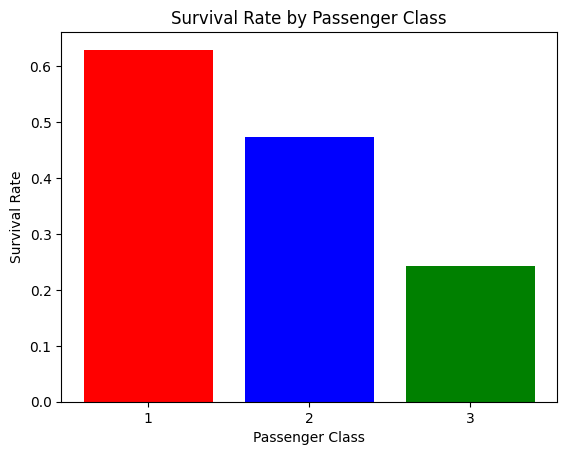

In [17]:
# Group by 'Pclass' and calculate survival rate
survival_rate_by_class = titanic_dataset.groupby('Pclass')['Survived'].mean()

# Plotting
plt.bar(survival_rate_by_class.index, survival_rate_by_class.values, color=['red', 'blue', 'green'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(survival_rate_by_class.index)
plt.show()

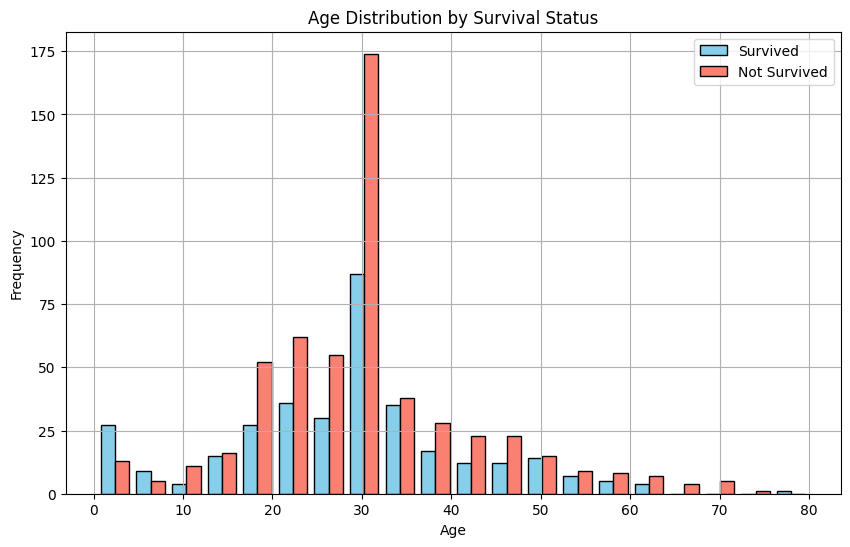

In [7]:
# Filter out rows with missing age data
titanic_data = titanic_dataset.dropna(subset=['Age'])

# Separate data into survived and not survived groups
survived = titanic_data[titanic_data['Survived'] == 1]
not_survived = titanic_data[titanic_data['Survived'] == 0]

# Plot age against survival
plt.figure(figsize=(10, 6))
plt.hist([survived['Age'], not_survived['Age']], bins=20, color=['skyblue', 'salmon'], edgecolor='black', label=['Survived', 'Not Survived'])
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#preprocessing data

#Dropping irrelevant columns
titanic_dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
print(titanic_dataset)
print(titanic_dataset.describe())
print(titanic_dataset.info())

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean

In [19]:
#Handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
#imputing Age
titanic_dataset['Age'] = imputer.fit_transform(titanic_dataset[['Age']])
#imputing Embarked
titanic_dataset['Embarked'].fillna('S', inplace=True)
print(titanic_dataset.info())
print(titanic_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [20]:
X = titanic_dataset.drop('Survived', axis = 1)
y = titanic_dataset['Survived']

print('Matrix of features:\n ', X)
print('Dependent variable:\n ',y)

Matrix of features:
       Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.699118      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]
Dependent variable:
  0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [21]:
#Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Identify the categorical data
categorical_features = ['Sex', 'Embarked', 'Pclass']
# Implement an instance of the ColumnTransformer class
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), categorical_features)], remainder = 'passthrough')
X = ct.fit_transform(X)
X = pd.DataFrame(X)
print(X.head())

    0    1    2    3    4    5    6    7     8    9    10       11
0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  22.0  1.0  0.0   7.2500
1  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  38.0  1.0  0.0  71.2833
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  26.0  0.0  0.0   7.9250
3  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  35.0  1.0  0.0  53.1000
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  35.0  0.0  0.0   8.0500


In [22]:
X = np.array(X)
print(X)

print('Encoded Categorical Matrix of features:\n ', X)

[[ 0.      1.      0.     ...  1.      0.      7.25  ]
 [ 1.      0.      1.     ...  1.      0.     71.2833]
 [ 1.      0.      0.     ...  0.      0.      7.925 ]
 ...
 [ 1.      0.      0.     ...  1.      2.     23.45  ]
 [ 0.      1.      1.     ...  0.      0.     30.    ]
 [ 0.      1.      0.     ...  0.      0.      7.75  ]]
Encoded Categorical Matrix of features:
  [[ 0.      1.      0.     ...  1.      0.      7.25  ]
 [ 1.      0.      1.     ...  1.      0.     71.2833]
 [ 1.      0.      0.     ...  0.      0.      7.925 ]
 ...
 [ 1.      0.      0.     ...  1.      2.     23.45  ]
 [ 0.      1.      1.     ...  0.      0.     30.    ]
 [ 0.      1.      0.     ...  0.      0.      7.75  ]]


In [23]:
#Encoding the dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print('Encoded Categorical dependent variable vector:\n ', y)

Encoded Categorical dependent variable vector:
  [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 

In [24]:
#Splitting the dataset into train and test
from sklearn.model_selection import StratifiedShuffleSplit
# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
# Split the data using StratifiedShuffleSplit
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
print('x-train: ',X_train)
print('x-test: ',X_test)
print('y-train: ',y_train)
print('y-test: ',y_test)

x-train:  [[  1.      0.      0.    ...   0.      0.      7.75 ]
 [  1.      0.      0.    ...   4.      2.     31.275]
 [  1.      0.      0.    ...   1.      0.     17.8  ]
 ...
 [  0.      1.      0.    ...   0.      0.     10.5  ]
 [  1.      0.      1.    ...   0.      0.    134.5  ]
 [  0.      1.      0.    ...   0.      0.      8.05 ]]
x-test:  [[ 0.      1.      0.     ...  0.      0.     13.5   ]
 [ 0.      1.      1.     ...  0.      1.     61.9792]
 [ 0.      1.      0.     ...  0.      0.      0.    ]
 ...
 [ 1.      0.      0.     ...  0.      0.     13.    ]
 [ 0.      1.      0.     ...  0.      0.      7.75  ]
 [ 1.      0.      0.     ...  3.      1.     25.4667]]
y-train:  [1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0

In [25]:
#Feature Scaling
#standardisation:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Featured Scaled x-train:\n ',X_train)
print('Featured Scaled x-test:\n ',X_test)

Featured Scaled x-train:
  [[ 1.36783323 -1.36783323 -0.48370322 ... -0.46487255 -0.48246579
  -0.51166358]
 [ 1.36783323 -1.36783323 -0.48370322 ...  3.11338965  1.98001193
  -0.01388917]
 [ 1.36783323 -1.36783323 -0.48370322 ...  0.429693   -0.48246579
  -0.29901181]
 ...
 [-0.73108328  0.73108328 -0.48370322 ... -0.46487255 -0.48246579
  -0.45347529]
 [ 1.36783323 -1.36783323  2.06738339 ... -0.46487255 -0.48246579
   2.17028784]
 [-0.73108328  0.73108328 -0.48370322 ... -0.46487255 -0.48246579
  -0.50531577]]
Featured Scaled x-test:
  [[-0.73108328  0.73108328 -0.48370322 ... -0.46487255 -0.48246579
  -0.38999715]
 [-0.73108328  0.73108328  2.06738339 ... -0.46487255  0.74877307
   0.63579267]
 [-0.73108328  0.73108328 -0.48370322 ... -0.46487255 -0.48246579
  -0.67564878]
 ...
 [ 1.36783323 -1.36783323 -0.48370322 ... -0.46487255 -0.48246579
  -0.40057684]
 [-0.73108328  0.73108328 -0.48370322 ... -0.46487255 -0.48246579
  -0.51166358]
 [ 1.36783323 -1.36783323 -0.48370322 ...  2.

Random Forest Classifier Accuracy: 0.8324022346368715
K-Nearest Neighbors Classifier Accuracy: 0.8435754189944135
Support Vector Machine Classifier Accuracy: 0.8491620111731844


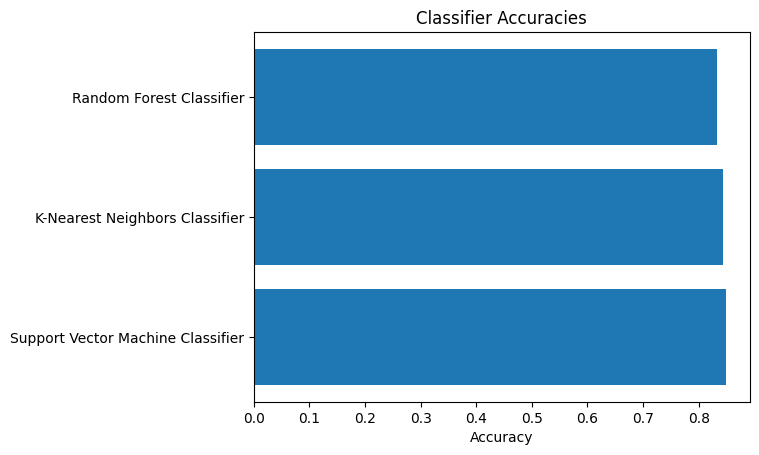


Best Model: Support Vector Machine Classifier with Accuracy: 0.8491620111731844


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define classifiers
classifiers = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine Classifier": SVC(kernel='rbf', random_state=42)
}

accuracies = []

# Loop through classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

# Plotting the accuracies
fig, ax = plt.subplots()
models = classifiers.keys()
y_pos = np.arange(len(models))
ax.barh(y_pos, accuracies, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Classifier Accuracies')
plt.show()

# Find the best model
best_accuracy = max(accuracies)
best_model = list(classifiers.keys())[accuracies.index(best_accuracy)]
print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy}")

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf']  # Kernel type
}

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Extract results
results = grid_search.cv_results_
means = results['mean_test_score']
params = results['params']


# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Instantiate SVM Classifier with best parameters
best_svm_classifier = SVC(**best_params)

# Train the model with best parameters
best_svm_classifier.fit(X_train, y_train)

# Predictions and accuracy with tuned SVM Classifier
svm_pred_tuned = best_svm_classifier.predict(X_test)
svm_accuracy_tuned = accuracy_score(y_test, svm_pred_tuned)
print("Tuned Support Vector Machine Classifier Accuracy:", svm_accuracy_tuned)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.8131980695360976
Tuned Support Vector Machine Classifier Accuracy: 0.8435754189944135


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred_tuned)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy score
accuracy = accuracy_score(y_test, svm_pred_tuned)
print("Accuracy Score:", accuracy)

# Precision
precision = precision_score(y_test, svm_pred_tuned, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, svm_pred_tuned, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, svm_pred_tuned, average='weighted')
print("F1 Score:", f1)

Confusion Matrix:
[[103   7]
 [ 21  48]]
Accuracy Score: 0.8435754189944135
Precision: 0.8468667573190911
Recall: 0.8435754189944135
F1 Score: 0.8394243669067961
